# First EDA

**Definir el problema y el objetivo:**

Problema: Determinar qué clientes tienen mayor probabilidad de abandonar (variable Exited) y cuáles son los factores asociados al abandono.
Objetivo: Diseñar un modelo probabilístico basado en redes neuronales bayesianas que capture la incertidumbre en las predicciones y proponer estrategias basadas en economía conductual.

## Libraries and data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [11]:
df = pd.read_csv('../data/Customer-Churn-Records.csv')

print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [12]:
# check data
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general del dataset:")
print(df.info())

print("\nDescripción estadística de las variables numéricas:")
print(df.describe())


Primeras filas del dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   D

In [ ]:
df.columns = df.columns.str.replace(' ', '_', regex=True)
df.columns


Valores nulos por columna:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction_Score    0
Card_Type             0
Point_Earned          0
dtype: int64


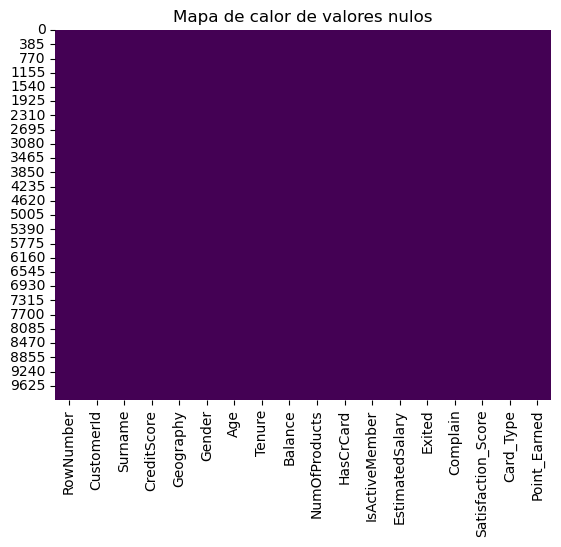

In [18]:
# Conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


/var/folders/8v/p9jmdytd6y36kdsq55l4_cqw0000gn/T/ipykernel_16469/1171975621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


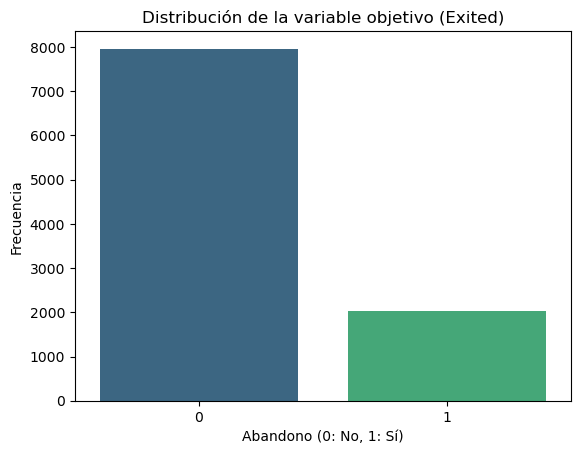


Proporción de clientes que abandonaron:
Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


In [19]:
# Visualizar la distribución de la variable objetivo
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title("Distribución de la variable objetivo (Exited)")
plt.xlabel("Abandono (0: No, 1: Sí)")
plt.ylabel("Frecuencia")
plt.show()

# Proporción de las clases
print("\nProporción de clientes que abandonaron:")
print(df['Exited'].value_counts(normalize=True))


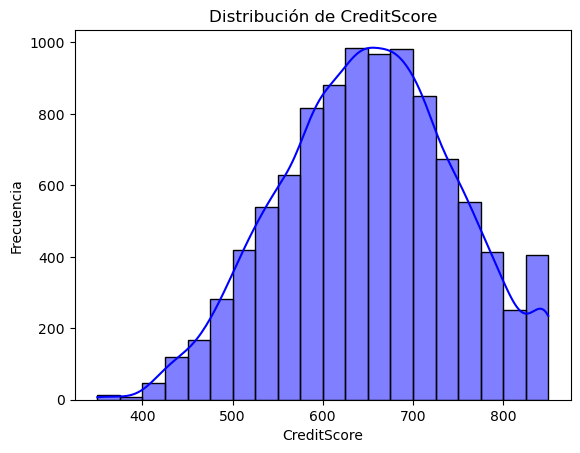

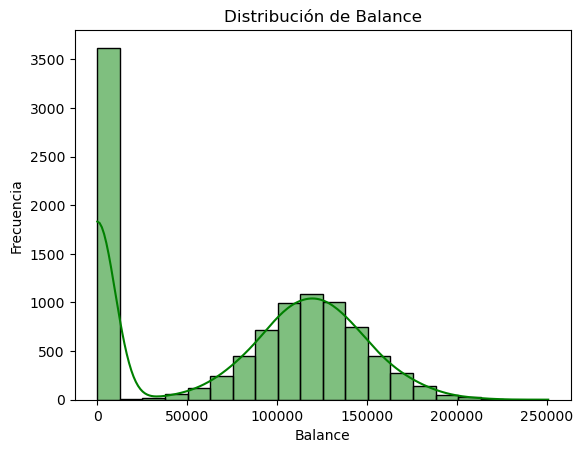

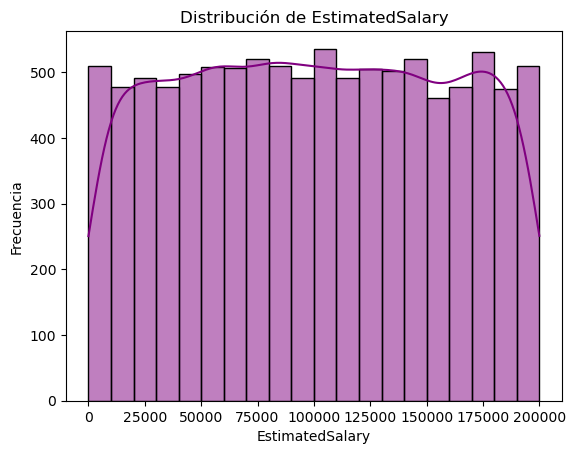

In [20]:
# Distribución de CreditScore
sns.histplot(df['CreditScore'], kde=True, bins=20, color='blue')
plt.title("Distribución de CreditScore")
plt.xlabel("CreditScore")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de Balance
sns.histplot(df['Balance'], kde=True, bins=20, color='green')
plt.title("Distribución de Balance")
plt.xlabel("Balance")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de EstimatedSalary
sns.histplot(df['EstimatedSalary'], kde=True, bins=20, color='purple')
plt.title("Distribución de EstimatedSalary")
plt.xlabel("EstimatedSalary")
plt.ylabel("Frecuencia")
plt.show()


/var/folders/8v/p9jmdytd6y36kdsq55l4_cqw0000gn/T/ipykernel_16469/2278782582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Satisfaction_Score', data=df, palette='coolwarm')


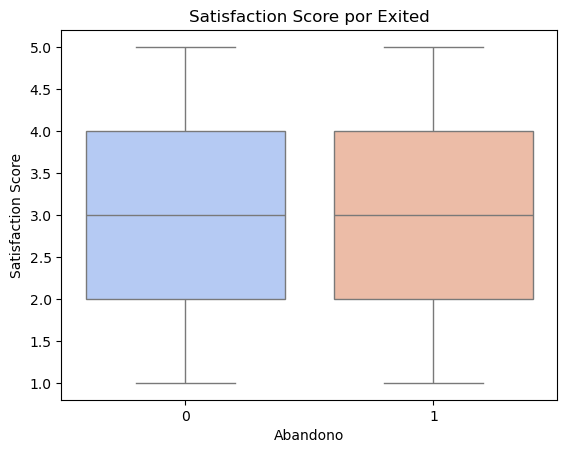

/var/folders/8v/p9jmdytd6y36kdsq55l4_cqw0000gn/T/ipykernel_16469/2278782582.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm')


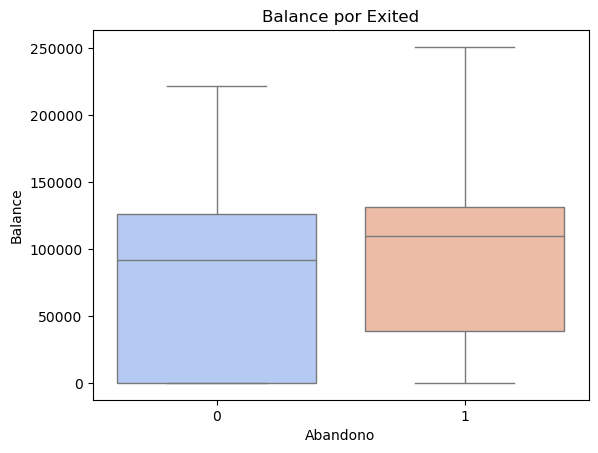

In [21]:
# Boxplot para Satisfaction Score por Exited
sns.boxplot(x='Exited', y='Satisfaction_Score', data=df, palette='coolwarm')
plt.title("Satisfaction Score por Exited")
plt.xlabel("Abandono")
plt.ylabel("Satisfaction Score")
plt.show()

# Boxplot para Balance por Exited
sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm')
plt.title("Balance por Exited")
plt.xlabel("Abandono")
plt.ylabel("Balance")
plt.show()


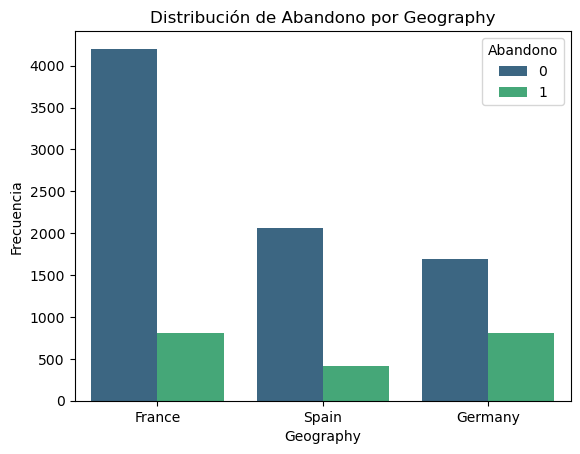

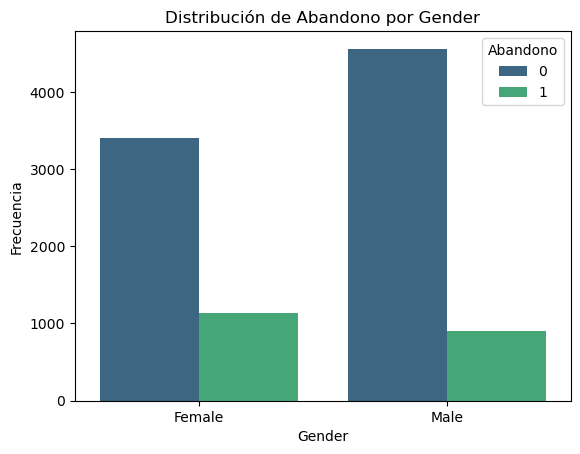

In [22]:
# Distribución de Exited por Geography
sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title("Distribución de Abandono por Geography")
plt.xlabel("Geography")
plt.ylabel("Frecuencia")
plt.legend(title="Abandono")
plt.show()

# Distribución de Exited por Gender
sns.countplot(x='Gender', hue='Exited', data=df, palette='viridis')
plt.title("Distribución de Abandono por Gender")
plt.xlabel("Gender")
plt.ylabel("Frecuencia")
plt.legend(title="Abandono")
plt.show()


Columnas numéricas seleccionadas para el análisis de correlación:
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction_Score', 'Point_Earned'],
      dtype='object')


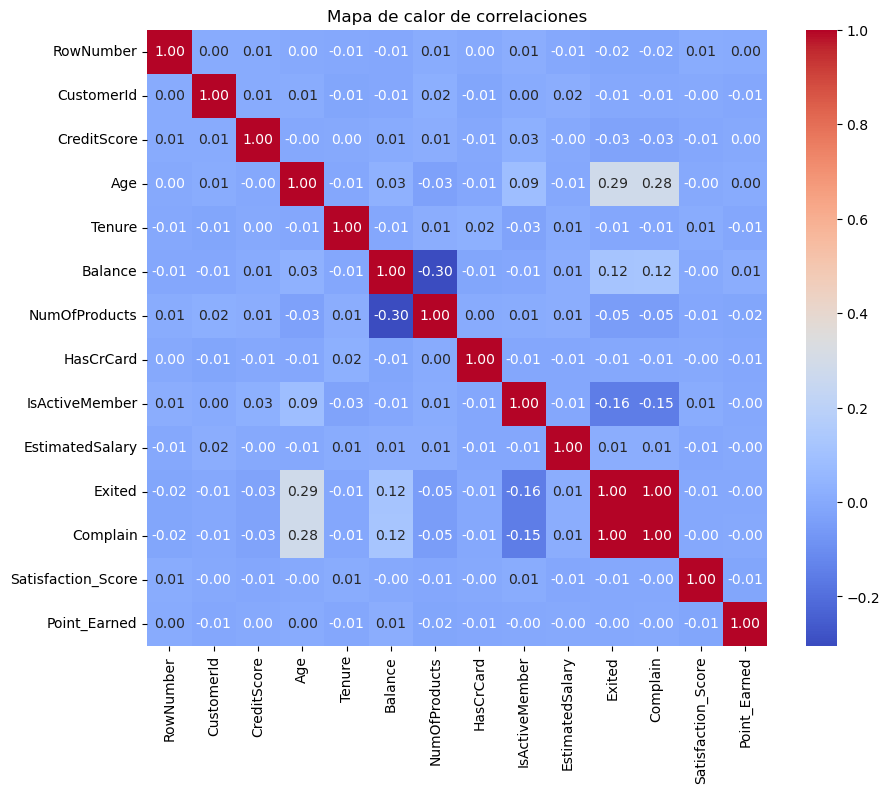

In [25]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre columnas numéricas
correlation_matrix = numeric_df.corr()

# Verificar las columnas seleccionadas
print("Columnas numéricas seleccionadas para el análisis de correlación:")
print(numeric_df.columns)

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


Columnas numéricas para análisis de outliers:
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction_Score', 'Point_Earned'],
      dtype='object')


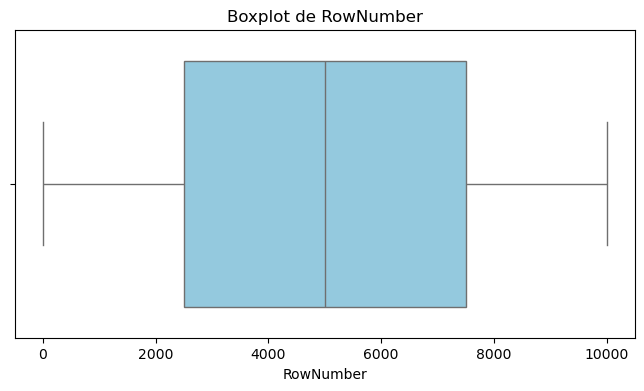

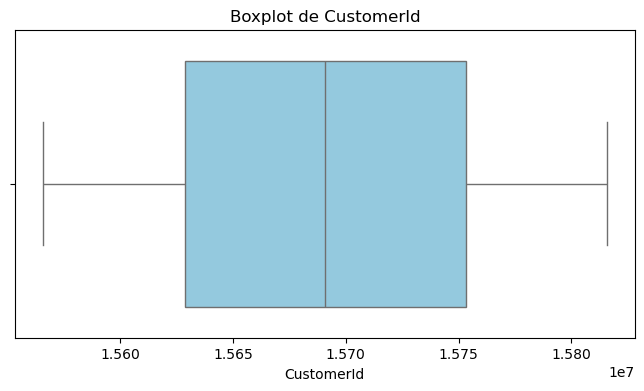

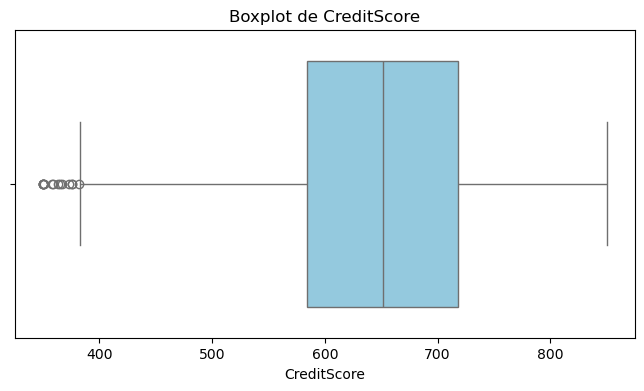

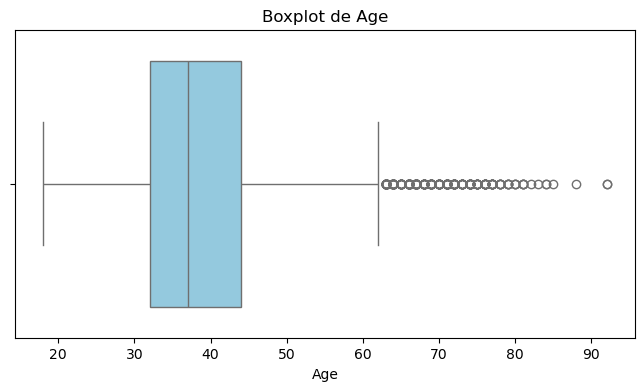

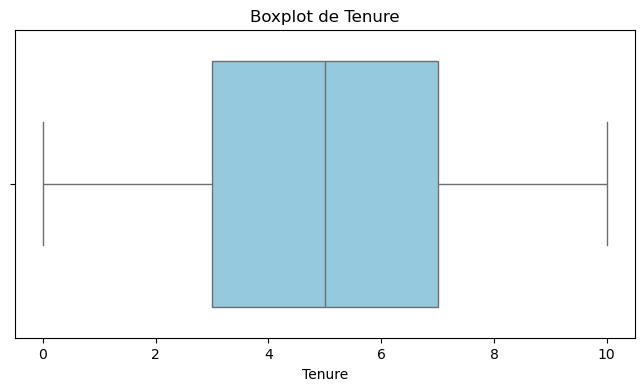

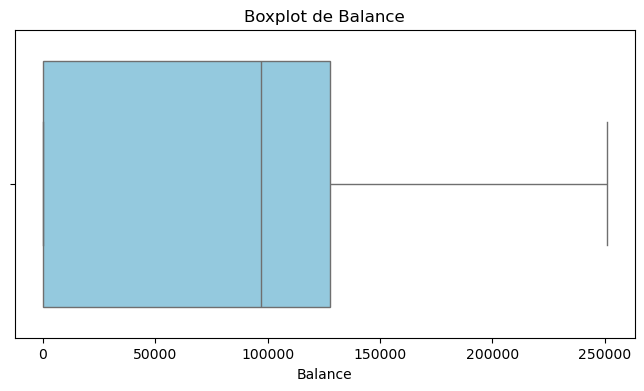

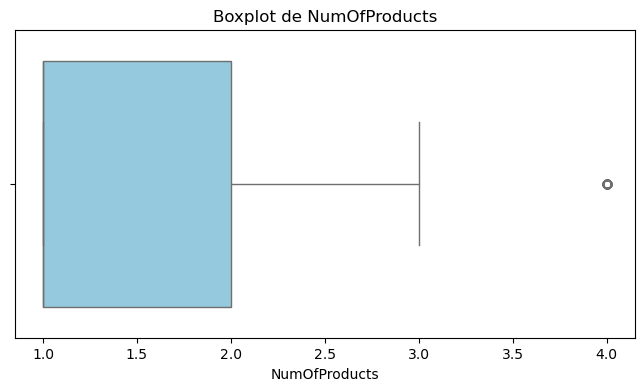

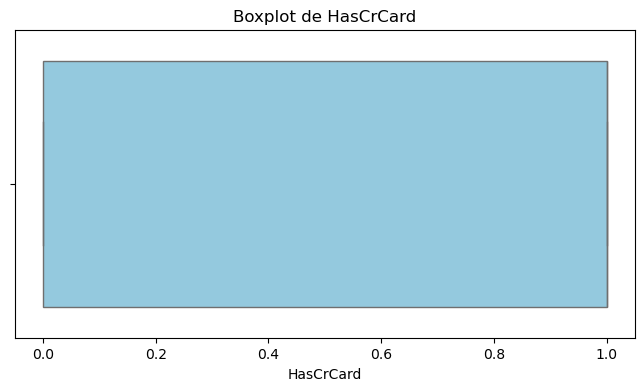

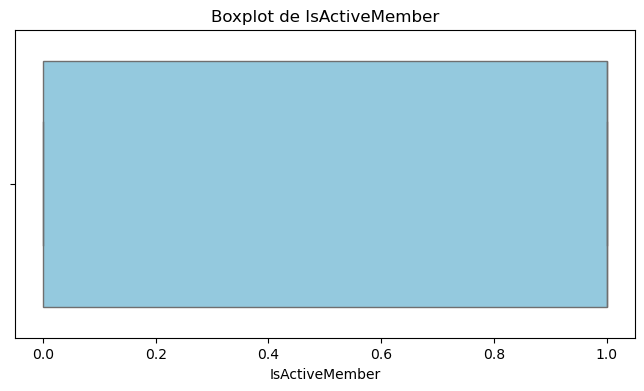

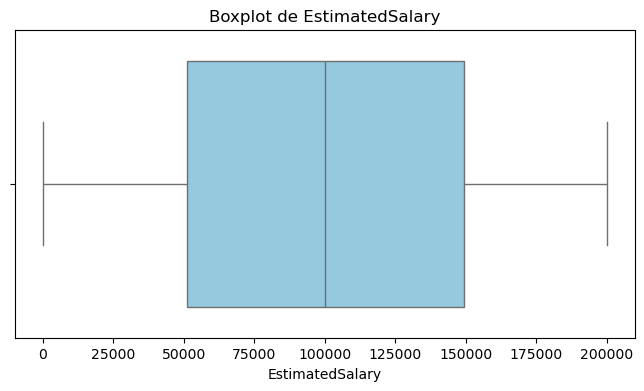

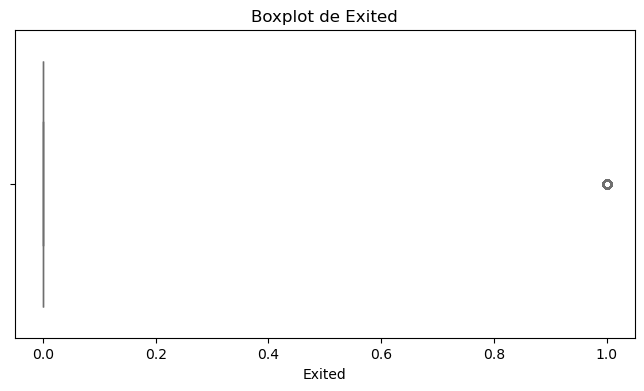

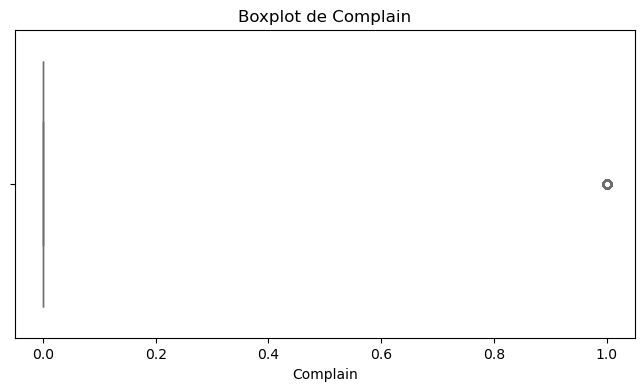

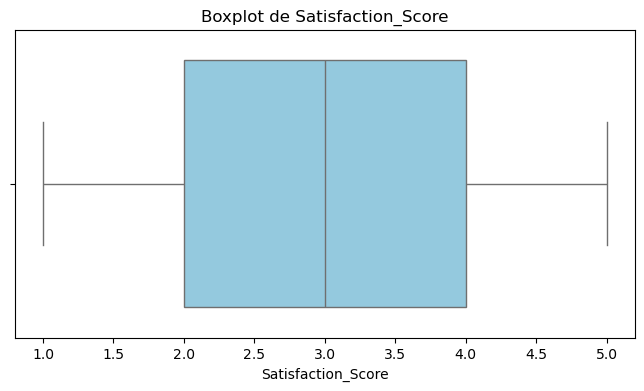

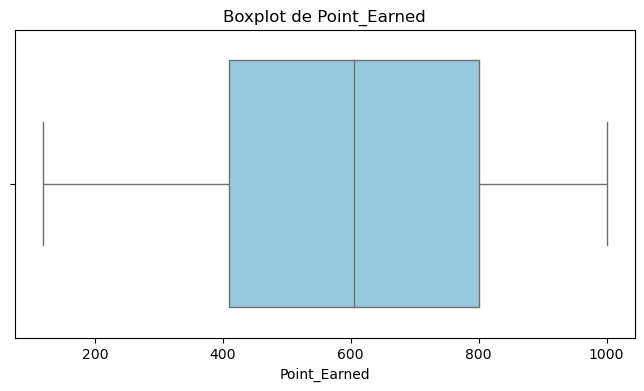

In [26]:
# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Columnas numéricas para análisis de outliers:")
print(numeric_cols)

# Graficar boxplots para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()



In [27]:
# Detectar outliers usando IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\nColumna: {col}")
    print(f"Límite inferior: {lower_bound}, Límite superior: {upper_bound}")
    print(f"Número de outliers: {len(outliers)}")



Columna: RowNumber
Límite inferior: -4998.5, Límite superior: 14999.5
Número de outliers: 0

Columna: CustomerId
Límite inferior: 15441470.0, Límite superior: 15940292.0
Número de outliers: 0

Columna: CreditScore
Límite inferior: 383.0, Límite superior: 919.0
Número de outliers: 15

Columna: Age
Límite inferior: 14.0, Límite superior: 62.0
Número de outliers: 359

Columna: Tenure
Límite inferior: -3.0, Límite superior: 13.0
Número de outliers: 0

Columna: Balance
Límite inferior: -191466.36000000002, Límite superior: 319110.60000000003
Número de outliers: 0

Columna: NumOfProducts
Límite inferior: -0.5, Límite superior: 3.5
Número de outliers: 60

Columna: HasCrCard
Límite inferior: -1.5, Límite superior: 2.5
Número de outliers: 0

Columna: IsActiveMember
Límite inferior: -1.5, Límite superior: 2.5
Número de outliers: 0

Columna: EstimatedSalary
Límite inferior: -96577.09624999999, Límite superior: 296967.45375
Número de outliers: 0

Columna: Exited
Límite inferior: 0.0, Límite super

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


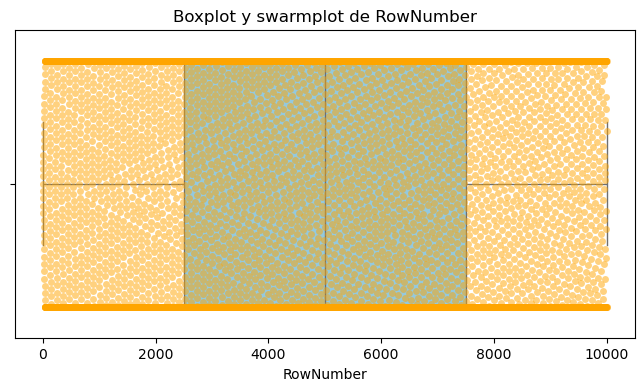

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


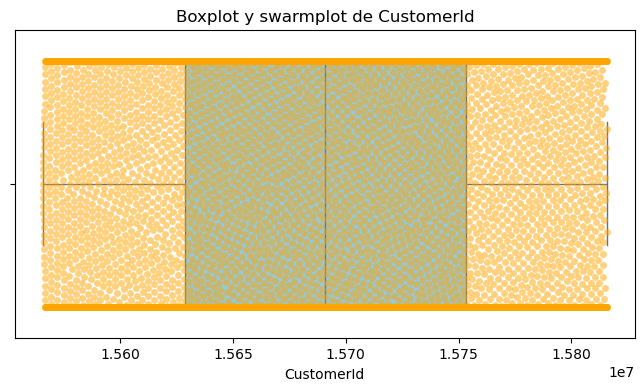

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


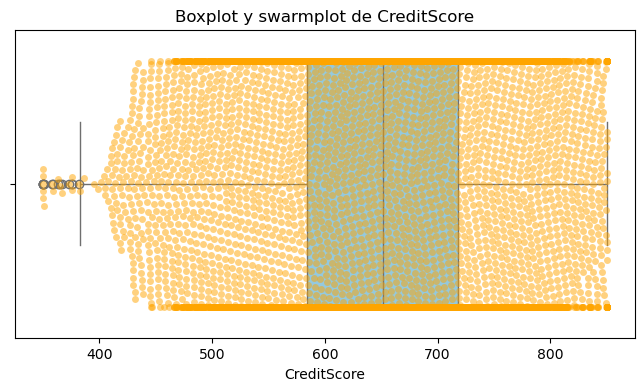

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [ ]:
# Visualización combinada
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="skyblue", whis=1.5)
    sns.swarmplot(x=df[col], color="orange", alpha=0.5)
    plt.title(f"Boxplot y swarmplot de {col}")
    plt.xlabel(col)
    plt.show()
